In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# import the data
mean_BMI = pd.read_csv("Mean BMI among adults.csv")
depression = pd.read_csv("Population based prevalence of depression.csv")

In [4]:
print(mean_BMI.shape)
print(depression.shape)

(198, 127)
(184, 2)


In [5]:
# Take only the columns we need
mean_BMI_df = mean_BMI[['Unnamed: 0','2015','2015.1','2015.2']]

In [6]:
mean_BMI_df.head()

,Unnamed: 0,2015,2015.1,2015.2
0,NaN,"Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)","Mean BMI (kg/m&amp;#xb2,) (crude estimate)"
1,NaN,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female
3,Afghanistan,22.9 [21.6-24.3],22.3 [19.8-24.8],23.6 [22.7-24.5]
4,Albania,26.7 [25.9-27.5],26.9 [25.8-28.0],26.4 [25.2-27.7]


In [7]:
mean_BMI_df.columns

Index(['Unnamed: 0', '2015', '2015.1', '2015.2'], dtype='object')

In [8]:
# rename columns 
mean_BMI_df_columnNames = ['Country','mean_BMI_both_sexes','mean_BMI_male','mean_BMI_female']
mean_BMI_df.columns = mean_BMI_df_columnNames

In [9]:
mean_BMI_df.drop([0,1,2] ,inplace=True)
mean_BMI_df.head()

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,mean_BMI_both_sexes,mean_BMI_male,mean_BMI_female
3,Afghanistan,22.9 [21.6-24.3],22.3 [19.8-24.8],23.6 [22.7-24.5]
4,Albania,26.7 [25.9-27.5],26.9 [25.8-28.0],26.4 [25.2-27.7]
5,Algeria,25.5 [24.5-26.4],24.6 [23.3-25.8],26.4 [25.0-27.7]
6,Andorra,27.0 [25.0-29.1],27.6 [25.2-30.1],26.5 [23.1-29.8]
7,Angola,22.9 [20.7-25.2],22.1 [19.4-24.7],23.8 [20.2-27.3]


In [10]:
mean_BMI_df.reset_index(inplace=True)


In [11]:
mean_BMI_df.drop(['index'],axis=1,inplace=True)

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
mean_BMI_df.head()

,Country,mean_BMI_both_sexes,mean_BMI_male,mean_BMI_female
0,Afghanistan,22.9 [21.6-24.3],22.3 [19.8-24.8],23.6 [22.7-24.5]
1,Albania,26.7 [25.9-27.5],26.9 [25.8-28.0],26.4 [25.2-27.7]
2,Algeria,25.5 [24.5-26.4],24.6 [23.3-25.8],26.4 [25.0-27.7]
3,Andorra,27.0 [25.0-29.1],27.6 [25.2-30.1],26.5 [23.1-29.8]
4,Angola,22.9 [20.7-25.2],22.1 [19.4-24.7],23.8 [20.2-27.3]


In [13]:
BMI_bothSex = [a.split(" ")[0] for a in mean_BMI_df['mean_BMI_both_sexes']]
BMI_male = [b.split(" ")[0] for b in mean_BMI_df['mean_BMI_male']]
BMI_female = [c.split(" ")[0] for c in mean_BMI_df['mean_BMI_female']]


In [14]:
meanBMI_cleaned = pd.DataFrame({"Country": mean_BMI_df['Country'],
                               "BMI_bothSexes":BMI_bothSex,
                               "BMI_male":BMI_male,
                               "BMI_female":BMI_female})
print(meanBMI_cleaned.shape)
# Delete rows with no data
meanBMI_cleaned = meanBMI_cleaned[~meanBMI_cleaned["BMI_bothSexes"].isin(['No'])]

# check if changes are made
print(meanBMI_cleaned.shape)

(195, 4)
(191, 4)


In [15]:
# change data types from object to floats
meanBMI_cleaned["BMI_bothSexes"] = meanBMI_cleaned["BMI_bothSexes"].astype("float")
meanBMI_cleaned["BMI_male"] = meanBMI_cleaned["BMI_male"].astype("float")
meanBMI_cleaned["BMI_female"] = meanBMI_cleaned["BMI_female"].astype("float")

# meanBMI cleaned

In [16]:
print(meanBMI_cleaned.dtypes)
meanBMI_cleaned.head()

Country           object
BMI_bothSexes    float64
BMI_male         float64
BMI_female       float64
dtype: object


,Country,BMI_bothSexes,BMI_male,BMI_female
0,Afghanistan,22.9,22.3,23.6
1,Albania,26.7,26.9,26.4
2,Algeria,25.5,24.6,26.4
3,Andorra,27.0,27.6,26.5
4,Angola,22.9,22.1,23.8


In [17]:
depression_columnNames = ['Country','Estimated_depression']
depression.columns = depression_columnNames

In [18]:
depression.drop([0], axis=0,inplace=True)

In [19]:
depression = depression.reset_index()

In [20]:
depression.drop(['index'],axis=1,inplace=True)

# Depression Cleaned

In [21]:
depression_df = depression

In [22]:
depression_df.head()

,Country,Estimated_depression
0,Afghanistan,3.3
1,Albania,4.8
2,Algeria,4.5
3,Angola,3.6
4,Antigua and Barbuda,5.1


In [23]:
# concat the two datasets
depression_BMI = pd.concat([depression_df, meanBMI_cleaned])

In [24]:
# group by country
Country_group = depression_BMI.groupby(['Country']).sum()

In [25]:
Country_group.head()

,Estimated_depression,BMI_bothSexes,BMI_male,BMI_female
Country,,,,
Afghanistan,3.3,22.9,22.3,23.6
Albania,4.8,26.7,26.9,26.4
Algeria,4.5,25.5,24.6,26.4
Andorra,0.0,27.0,27.6,26.5
Angola,3.6,22.9,22.1,23.8


In [26]:
not_in_BMI= Country_group.loc[Country_group['BMI_bothSexes'] == 0,:].index
not_in_depression = Country_group.loc[Country_group['Estimated_depression']==0,:].index

In [27]:
not_in_BMI
not_in_depression

Index(['Andorra', 'Cook Islands', 'Dominica', 'Marshall Islands', 'Nauru',
       'Niue', 'Palau', 'Saint Kitts and Nevis', 'Sudan (former)', 'Tuvalu'],
      dtype='object', name='Country')

In [28]:
Country_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Estimated_depression  193 non-null    float64
 1   BMI_bothSexes         193 non-null    float64
 2   BMI_male              193 non-null    float64
 3   BMI_female            193 non-null    float64
dtypes: float64(4)
memory usage: 12.5+ KB


In [29]:
# Drop null data
zero_data = not_in_BMI.append(not_in_depression)
Country_group.drop(zero_data, axis=0,inplace=True)

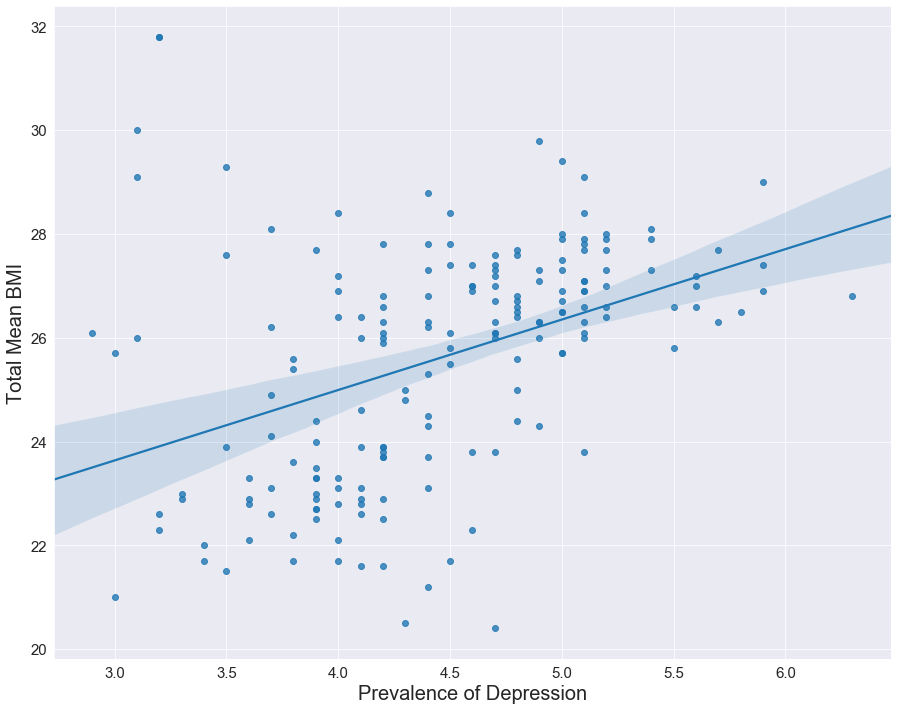

In [30]:
width=15
height = 12
plt.figure(figsize = (width,height))
sns.set_style('darkgrid')
total_BMI_plot = sns.regplot(x='Estimated_depression', y='BMI_bothSexes', data=Country_group)

total_BMI_plot.set_xlabel("Prevalence of Depression", fontsize = 20)
total_BMI_plot.set_ylabel("Total Mean BMI", fontsize = 20)
total_BMI_plot.tick_params(labelsize=15)

plt.show()
total_BMI_plot.get_figure().savefig("Depression vs Total BMI.png")

This plot shows the relationship between Prevalence of Depression (predictor variable) and the Mean BMI for each country, which is our target variable. We chose our target variable to be the mean BMI because this would be the outcome we are trying to predict. 

From this scatterplot, we can see that as the Prevalence of Depression increases, the mean BMI increases as well. This scatterplot gives as an initial indication that there is a positive linear relationship between depression levels and BMI ratings.  

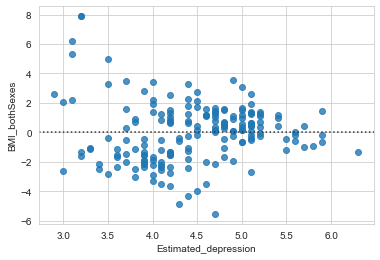

In [31]:
sns.set_style("whitegrid")
residual_plot = sns.residplot(Country_group['Estimated_depression'], Country_group['BMI_bothSexes'])
residual_plot.get_figure().savefig("residual plot.png")


* the residuals are not randomly spread out around the x-axis, so we decided to use a multiple linear regression model for this data. 

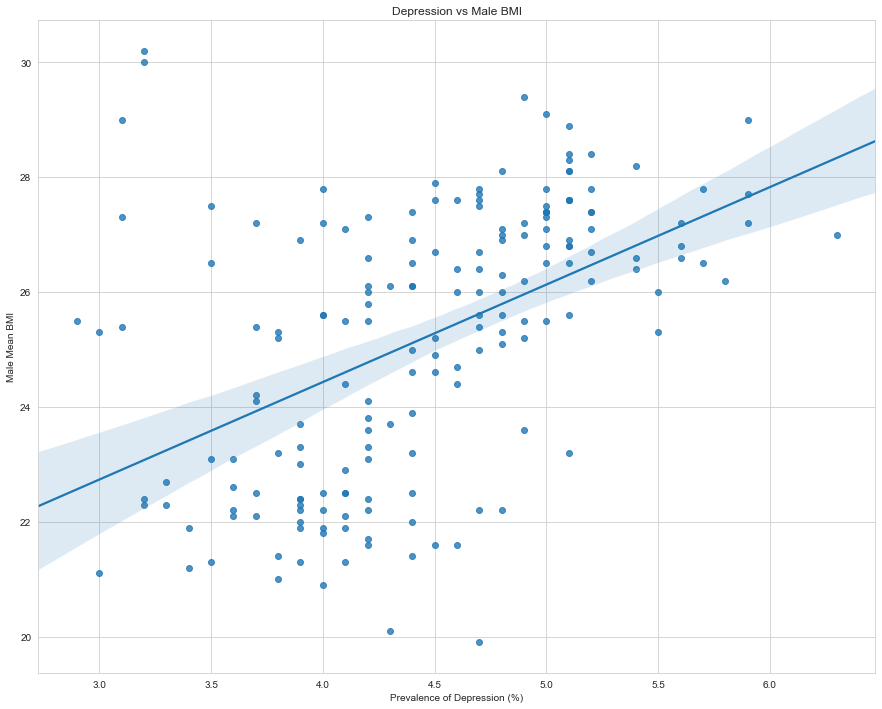

<Figure size 432x288 with 0 Axes>

In [32]:
width=15
height = 12
plt.figure(figsize = (width,height))

sns.regplot(x='Estimated_depression', y='BMI_male', data=Country_group)
plt.xlabel('Prevalence of Depression (%)')
plt.ylabel("Male Mean BMI")
plt.title("Depression vs Male BMI")
plt.show()
plt.savefig("Depression vs Male BMI.png")

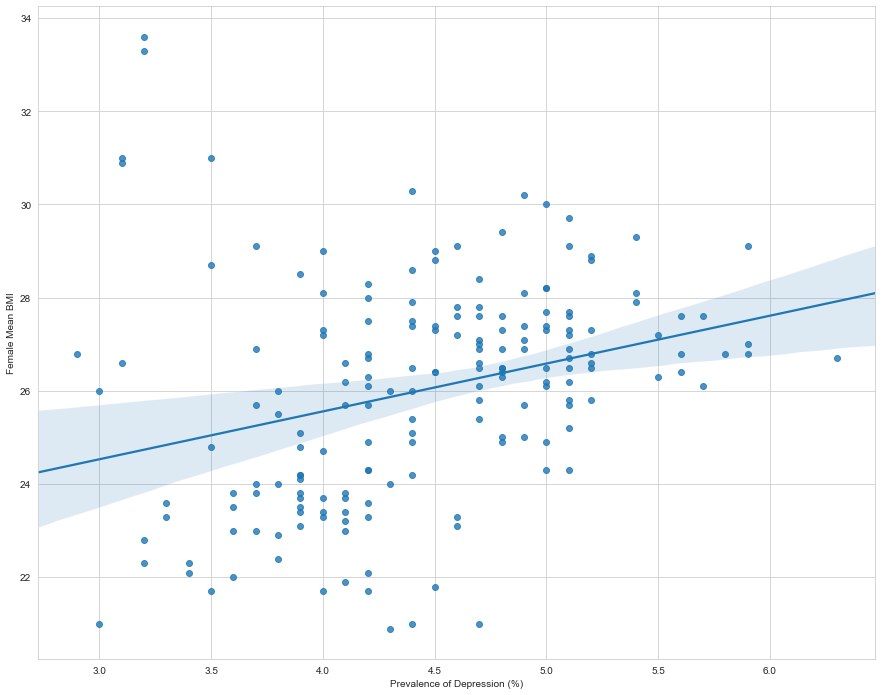

<Figure size 432x288 with 0 Axes>

In [33]:
width=15
height = 12
plt.figure(figsize = (width,height))

sns.regplot(x='Estimated_depression', y='BMI_female', data=Country_group)
plt.xlabel('Prevalence of Depression (%)')
plt.ylabel("Female Mean BMI")

# plt.title("Depression vs Female BMI")
plt.show()
plt.savefig("Depression vs Female BMI.png")

In [34]:
Country_group.corr()

,Estimated_depression,BMI_bothSexes,BMI_male,BMI_female
Estimated_depression,1.000000,0.406371,0.485215,0.294962
BMI_bothSexes,0.406371,1.000000,0.956656,0.958639
BMI_male,0.485215,0.956656,1.000000,0.834904
BMI_female,0.294962,0.958639,0.834904,1.000000


In [35]:
from scipy import stats

In [36]:
pearson_coef, p_value = stats.pearsonr(Country_group['Estimated_depression'],Country_group['BMI_bothSexes'])
print(f"The p value is {p_value} and the pearson coefficient is {round(pearson_coef,3)}")

The p value is 1.3776380463975736e-08 and the pearson coefficient is 0.406


The p-value is less than 0.001 which means there is strong evidence that the correlation between depression percentage and the mean BMI is statistically significant. The low P value suggests that this dataset provides strong evidence for us to reject the null hypothesis of depression not having any correlation with BMI. 

The pearson coefficient is at around 0.406 which represents a moderately weak positive relationship. We can say that the percentage of prevalence of depression can potentially be a good predictor of the average BMIs of a country.

We can also see that with the positive correlation, if estimated depression increases, BMI of both sexes also increases

In [37]:
pearson_coef_male, p_value_male = stats.pearsonr(Country_group['Estimated_depression'],Country_group['BMI_male'])
print(f"The p value is {p_value_male} and the pearson coefficient is {round(pearson_coef_male,3)}")

The p value is 4.437823250256399e-12 and the pearson coefficient is 0.485


In [38]:
pearson_coef_female, p_value_female = stats.pearsonr(Country_group['Estimated_depression'],Country_group['BMI_female'])
print(f"The p value is {p_value_female} and the pearson coefficient is {round(pearson_coef_female,3)}")

The p value is 5.557155640428034e-05 and the pearson coefficient is 0.295


# Prediction Model

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
x = Country_group[['Estimated_depression']]
y = Country_group['BMI_bothSexes']

In [42]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# Output prediction 
Yhat = lm.predict(x)
Yhat[0:4]

array([24.04478317, 26.08024872, 25.67315561, 24.45187628])

In [44]:
# intercept
print(lm.intercept_)

# slope
print(lm.coef_)

# print linear regression
print(f"y = {lm.coef_}*BMI_bothSexes + {round(lm.intercept_,2)}")

19.566758942274426
[1.35697704]
y = [1.35697704]*BMI_bothSexes + 19.57


# Simple Linear Regression Model

In [46]:
lm.fit(x,y)
# R-squared
print(f"The R-square is {lm.score(x,y)}")

The R-square is 0.16513745902136634


In [47]:
Yhat = lm.predict(x)

In [70]:
mse = mean_squared_error(Country_group['BMI_bothSexes'],Yhat)
print(f"The mean square error of mean BMI and predicted value is {mse}")

The mean square error of mean BMI and predicted value is 4.2547455348080065


In [ ]:
x_train, x_test, y_train, y_test = train_test_split()

# Polynomial Fit

In [49]:
X = Country_group['Estimated_depression']
X.head()

Country
Afghanistan            3.3
Albania                4.8
Algeria                4.5
Angola                 3.6
Antigua and Barbuda    5.1
Name: Estimated_depression, dtype: float64

In [50]:
y.head()

Country
Afghanistan            22.9
Albania                26.7
Algeria                25.5
Angola                 22.9
Antigua and Barbuda    26.6
Name: BMI_bothSexes, dtype: float64

In [51]:
# Fit the polynomial to cubic
f = np.polyfit(X,y,9)
p = np.poly1d(f)
print(p)

          9         8         7         6        5        4        3
-0.09573 x + 3.234 x - 45.58 x + 337.4 x - 1287 x + 1269 x + 9662 x
             2
 - 4.38e+04 x + 7.601e+04 x - 5.022e+04


In [52]:
from sklearn.metrics import r2_score

In [53]:
r_squared = r2_score(y,p(X))
print(f"The R-squared value is: {r_squared}")

The R-squared value is: 0.2934981734446771


In [69]:
from sklearn.metrics import mean_squared_error

In [55]:
# MSE
mean_squared_error(Country_group['BMI_bothSexes'],p(x))

3.600575357407121

We find that we can better predict the model if we used Polynomial fit instead of linear regression because we calculated a higher r-squared value with the polynomial model (27.00%) than the linear model (16.51%). Even with the Polynomial fit model, the R-squared value is too low for us to confidently predict the variation of mean BMI with depression percentage of surveyed countries

Even though we calculated a low p-value that indicated depression and mean BMI to be statistically significant, the independent variable (prevalence of depression) does not account for much of the mean of the dependent variable (mean_BMI)

In [56]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

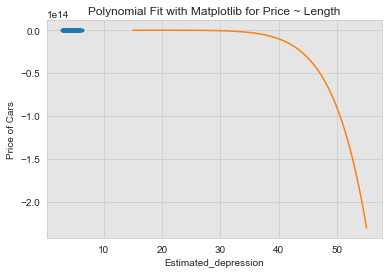

In [57]:
PlotPolly(p,X,y,'Estimated_depression')

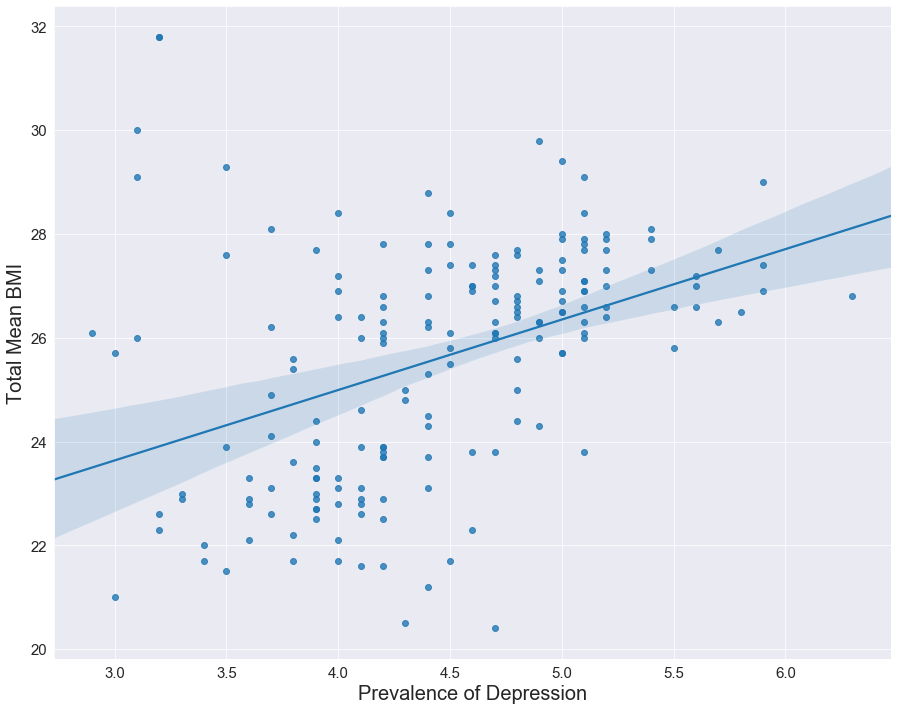

In [58]:
width=15
height = 12
plt.figure(figsize = (width,height))
sns.set_style('darkgrid')
total_BMI_plot = sns.regplot(x='Estimated_depression', y='BMI_bothSexes', data=Country_group)

total_BMI_plot.set_xlabel("Prevalence of Depression", fontsize = 20)
total_BMI_plot.set_ylabel("Total Mean BMI", fontsize = 20)
total_BMI_plot.tick_params(labelsize=15)

plt.show()
total_BMI_plot.get_figure().savefig("Depression vs Total BMI.png")

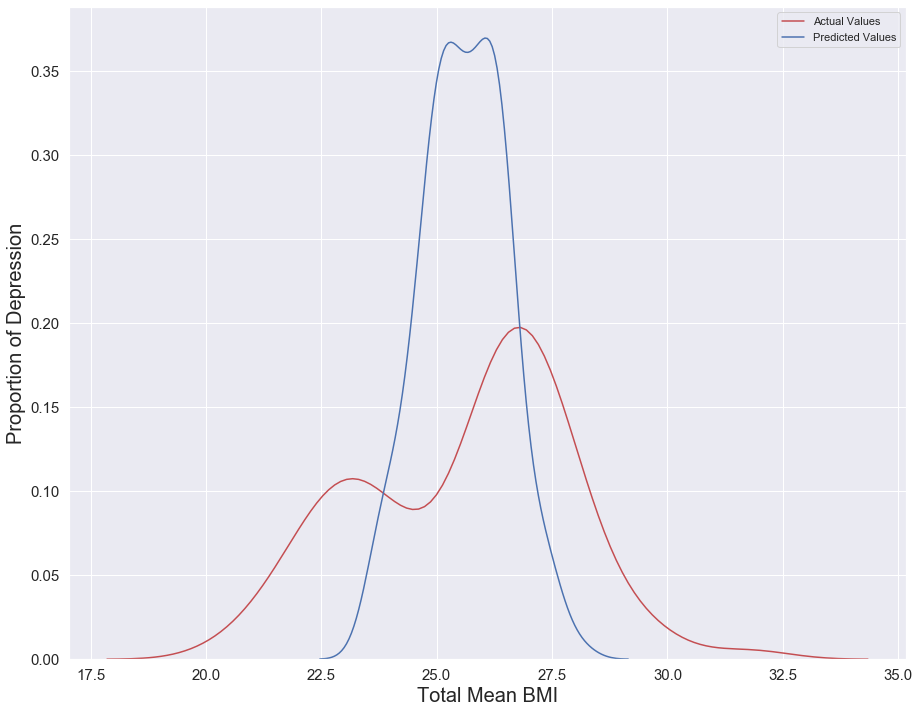

In [68]:
width = 15
height = 12
plt.figure(figsize = (width,height))
sns.set_style('darkgrid')
ax10 = sns.distplot(Country_group['BMI_bothSexes'],hist=False, color='r',label='Actual Values')
ax11 = sns.distplot(Yhat,hist=False,color='b',label="Predicted Values")

ax11.set_xlabel("Total Mean BMI", fontsize = 20)
ax11.set_ylabel("Proportion of Depression", fontsize = 20)
ax11.tick_params(labelsize=15)

plt.show()


In [71]:
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
# Set lower and upper quantiles
lower_alpha = 0.1
upper_alpha = 0.9

# Each model has to be separate
lower_model = GradientBoostingRegressor(loss='quantile',alpha = lower_alpha)
# the mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="ls")

upper_model = GradientBoostingRegressor(loss='quantile',alpha=upper_alpha)

In [78]:
# fit models
lower_model.fit(x,y)
mid_model.fit(x,y)
upper_model.fit(x,y)

# Record actual values on test set
predictions = pd.DataFrame(y_test)

NameError: name 'y_test' is not defined

NameError: name 'y_test' is not defined

# Bins

In [ ]:
bins = np.linspace(min(Country_group['Estimated_depression']),max(Country_group['Estimated_depression']),4)

Our dataset for "Estimated_depression"] has values ranging from 2.9% to 6.3% with 31 unique values. With this analysis, we want to find out the BMI difference between Countries with higher, medium, and lower depression percentages and to do that, we sliced our dataset into 3 bins of equal size using numpy's linspace function

In [ ]:
# Set group names
BMIGroup_names = ['Low', "Medium", 'High']

Country_group['depressionBins'] = pd.cut(Country_group['Estimated_depression'],bins,labels=BMIGroup_names,include_lowest=True)
Country_group.head()

In [60]:
Country_group = Country_group[['Estimated_depression', "depressionBins" ,'BMI_bothSexes','BMI_male','BMI_female']]

KeyError: "['depressionBins'] not in index"

In [61]:
# Check the number of countries placed in each bins
Country_group['depressionBins'].value_counts(sort = False)

KeyError: 'depressionBins'

Looking at the value counts of the

In [62]:
sns.set(style="ticks")
ax = sns.barplot(BMIGroup_names, Country_group['depressionBins'].value_counts(sort=False))

# Set labels and title
ax.set_title("depression bins")
ax.set_xlabel("Estimated Depression")
ax.set_ylabel("Count")

NameError: name 'BMIGroup_names' is not defined

In [63]:
# width=15
# height = 12
# plt.figure(figsize = (width,height))
# sns.set_style('darkgrid')
# total_BMI_plot = sns.regplot(x='Estimated_depression', y='BMI_bothSexes', data=Country_group)

# total_BMI_plot.set_xlabel("Prevalence of Depression", fontsize = 20)
# total_BMI_plot.set_ylabel("Total Mean BMI", fontsize = 20)
# total_BMI_plot.tick_params(labelsize=15)

# plt.show()
# total_BMI_plot.get_figure().savefig("Depression vs Total BMI.png")

In [64]:
width=15
height = 12
plt.figure(figsize = (width,height))
BMI_boxplot = sns.boxplot(x= 'depressionBins', y='BMI_bothSexes',data=Country_group)
BMI_boxplot.set_xlabel("Depression Bins", fontsize = 20)
BMI_boxplot.set_ylabel("Total Mean BMI", fontsize = 20)
BMI_boxplot.tick_params(labelsize=15)


ValueError: Could not interpret input 'depressionBins'

<Figure size 1080x864 with 0 Axes>

In [65]:
Country_group_cat = Country_group[['depressionBins','BMI_bothSexes','BMI_male','BMI_female']]

KeyError: "['depressionBins'] not in index"

In [66]:
Country_group_cat = Country_group_cat.reset_index()


NameError: name 'Country_group_cat' is not defined

In [67]:
Country_group_cat.drop(['Country'],axis=1,inplace=True)

NameError: name 'Country_group_cat' is not defined

In [162]:
Country_group_cat.groupby(['depressionBins']).mean()

,BMI_bothSexes,BMI_male,BMI_female
depressionBins,,,
Low,24.505660,23.839623,25.173585
Medium,25.813208,25.468868,26.170755
High,27.181818,27.068182,27.290909


From this data, we can see that depression levels that are classified as "High", on average, have the highest BMI ratings while "Medium" and "Low" have the second highest and lowest respectively.

This helps us understand that countries that have a higher percentage of prevalance of depression tend to have higher BMI averages within their populations.  

# ANOVA 
We will only look at BMI_bothSexes in this analysis
We will be using the ANOVA test to clarify the correlation between the different categories of depression levels we created earlier with "depressionBins". This test will return the F-test score and the p-value, with the F-test score describing the ratio of variation between the groups' mean over the variation within each of the sample groups. 

Our hypothesis is that depression does contribute to obesity and we perform an ANOVA test to prove the accuracy of the hypothesis.

In [163]:
grouped_anova_test = Country_group[['depressionBins','BMI_bothSexes']].groupby(['depressionBins'])

In [164]:
grouped_anova_test.mean()['BMI_bothSexes']

depressionBins
Low       24.505660
Medium    25.813208
High      27.181818
Name: BMI_bothSexes, dtype: float64

In [165]:
Country_group.head(10)

,Estimated_depression,depressionBins,BMI_bothSexes,BMI_male,BMI_female
Country,,,,,
Afghanistan,3.3,Low,22.9,22.3,23.6
Albania,4.8,Medium,26.7,26.9,26.4
Algeria,4.5,Medium,25.5,24.6,26.4
Angola,3.6,Low,22.9,22.1,23.8
Antigua and Barbuda,5.1,Medium,26.6,25.6,27.7
Argentina,4.7,Medium,27.6,27.7,27.6
Armenia,5.0,Medium,26.5,25.5,27.4
Australia,5.9,High,27.4,27.7,27.0
Austria,5.1,Medium,26.0,26.8,25.2


In [43]:
# get values of method group
grouped_anova_test.get_group("Low")['BMI_bothSexes']

Country
Afghanistan                              22.9
Angola                                   22.9
Benin                                    23.3
Brunei Darussalam                        27.2
Burkina Faso                             22.1
Cambodia                                 22.0
Cameroon                                 24.0
Chad                                     21.5
Congo                                    22.9
Côte d'Ivoire                            23.6
Democratic People's Republic of Korea    24.1
Democratic Republic of the Congo         21.7
Egypt                                    29.3
Fiji                                     27.6
Gambia                                   23.5
Guatemala                                26.2
Guinea                                   22.7
Guinea-Bissau                            23.1
Honduras                                 26.4
Indonesia                                23.1
Iraq                                     28.1
Jordan                    

In [44]:
f_val,p_val = stats.f_oneway(grouped_anova_test.get_group('Low')['BMI_bothSexes'],\
                             grouped_anova_test.get_group('Medium')['BMI_bothSexes'],\
                            grouped_anova_test.get_group('High')['BMI_bothSexes'])
print(f"F-value = {f_val} and p-value = {p_val}")

F-value = 13.736481263000515 and p-value = 2.8327839167375136e-06


From this calculation, we can see a large F score (13.74), which means there is a large difference between the means and a certain statistical significance with a small p-value (2.83e-6)
